<a href="https://colab.research.google.com/github/ivonnics/Arduino-ESP8266/blob/master/Message_Viewer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('CSV_Messages_5083339136Modified.csv')
print(df.shape)
print(df.dtypes)
df.head()

(180, 5)
Date           object
Time           object
Destination    object
Number         object
Direction      object
dtype: object


,Date,Time,Destination,Number,Direction
0,5/28/2019,8:48 AM,--,(508) 333-9132,Outgoing
1,5/26/2019,11:20 PM,"NATICK, MA",(508) 333-9132,Incoming
2,5/26/2019,11:20 PM,"NATICK, MA",(508) 333-9132,Outgoing
3,5/26/2019,11:20 PM,"NATICK, MA",(508) 333-9132,Incoming
4,5/26/2019,11:20 PM,"NATICK, MA",(508) 333-9132,Incoming


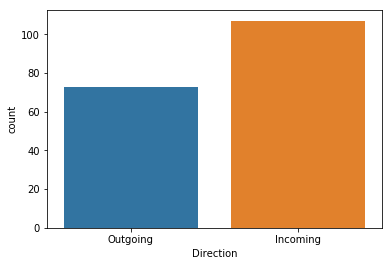

In [764]:
ax = sns.countplot(x="Direction", data=df)

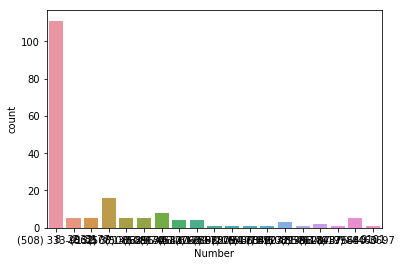

In [765]:
ax = sns.countplot(x="Number", data=df)

In [766]:
df.Number.value_counts()

(508) 333-9132    111
(862) 371-0629     16
(508) 726-2762      8
(617) 640-3697      5
(508) 333-9134      5
8  2932             5
(508) 816-0513      5
2  3177             5
(774) 810-2385      4
(617) 939-7805      4
(787) 371-8601      3
(857) 207-9988      2
(617) 820-8939      1
(617) 922-6905      1
9101                1
(617) 794-7846      1
(617) 875-4460      1
(508) 958-8437      1
(201) 803-9272      1
Name: Number, dtype: int64

In [767]:
df=df[df.Number == '(508) 726-2762']
print(df.shape)
df.head()

(8, 5)


,Date,Time,Destination,Number,Direction
143,5/12/2019,11:39 AM,"MARLBORO, MA",(508) 726-2762,Incoming
145,5/12/2019,11:36 AM,"MARLBORO, MA",(508) 726-2762,Incoming
147,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming
148,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming
149,5/12/2019,11:20 AM,"MARLBORO, MA",(508) 726-2762,Incoming


In [768]:
dataset1=[pd.to_datetime(hour, format="%I:%M %p", errors="coerce") for hour in df['Time']]
#dataset1=[pd.to_datetime(hour, format="%I:%M:%S %p", errors="coerce") for hour in df['Time']]
dataset2=pd.Series(dataset1).dt.hour
dataset3={'Hour': dataset2}
dataset4=pd.DataFrame(dataset3, columns = ['Hour'])
df.reset_index(inplace=True)
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
print(dataset4.shape)
print(dataset4.head())
print(df.shape)
print(df.head())
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
df_new1= pd.concat([df, dataset4], axis=1)
print(df_new1.shape)
df_new1.head()

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
(8, 1)
   Hour
0    11
1    11
2    11
3    11
4    11
(8, 6)
   index       Date      Time   Destination          Number Direction
0    143  5/12/2019  11:39 AM  MARLBORO, MA  (508) 726-2762  Incoming
1    145  5/12/2019  11:36 AM  MARLBORO, MA  (508) 726-2762  Incoming
2    147  5/12/2019  11:21 AM  MARLBORO, MA  (508) 726-2762  Incoming
3    148  5/12/2019  11:21 AM  MARLBORO, MA  (508) 726-2762  Incoming
4    149  5/12/2019  11:20 AM  MARLBORO, MA  (508) 726-2762  Incoming
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
(8, 7)


,index,Date,Time,Destination,Number,Direction,Hour
0,143,5/12/2019,11:39 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11
1,145,5/12/2019,11:36 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11
2,147,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11
3,148,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11
4,149,5/12/2019,11:20 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11


In [769]:
dataset5=[pd.to_datetime(weekday, format="%m/%d/%Y", errors="coerce") for weekday in df['Date']]


dataset6=pd.Series(dataset5).dt.weekday_name
dataset7={'Weekday': dataset6}

dataset8=pd.DataFrame(dataset7, columns = ['Weekday'])
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
print(dataset8.shape)
print(dataset8.head())
print(df_new1.shape)
print(df_new1.head())
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

df_new2= pd.concat([df_new1, dataset8], axis=1)
print(df_new2.shape)
df_new2.head(10)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
(8, 1)
  Weekday
0  Sunday
1  Sunday
2  Sunday
3  Sunday
4  Sunday
(8, 7)
   index       Date      Time   Destination          Number Direction  Hour
0    143  5/12/2019  11:39 AM  MARLBORO, MA  (508) 726-2762  Incoming    11
1    145  5/12/2019  11:36 AM  MARLBORO, MA  (508) 726-2762  Incoming    11
2    147  5/12/2019  11:21 AM  MARLBORO, MA  (508) 726-2762  Incoming    11
3    148  5/12/2019  11:21 AM  MARLBORO, MA  (508) 726-2762  Incoming    11
4    149  5/12/2019  11:20 AM  MARLBORO, MA  (508) 726-2762  Incoming    11
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
(8, 8)


,index,Date,Time,Destination,Number,Direction,Hour,Weekday
0,143,5/12/2019,11:39 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
1,145,5/12/2019,11:36 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
2,147,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
3,148,5/12/2019,11:21 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
4,149,5/12/2019,11:20 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
5,150,5/12/2019,11:20 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
6,151,5/12/2019,11:20 AM,"MARLBORO, MA",(508) 726-2762,Incoming,11,Sunday
7,158,5/12/2019,11:00 AM,--,(508) 726-2762,Outgoing,11,Sunday


In [770]:
df['Direction'].value_counts()

Incoming    7
Outgoing    1
Name: Direction, dtype: int64

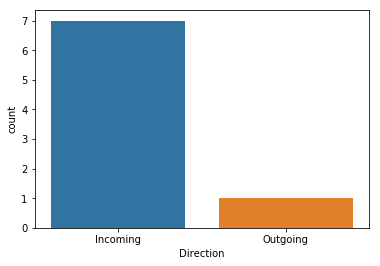

In [771]:
ax = sns.countplot(x="Direction", data=df)

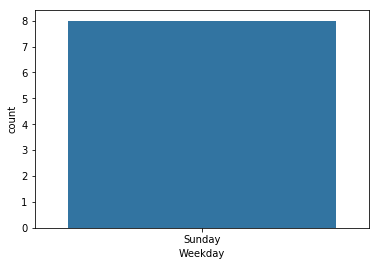

In [772]:
ax = sns.countplot(x="Weekday", data=df_new2)

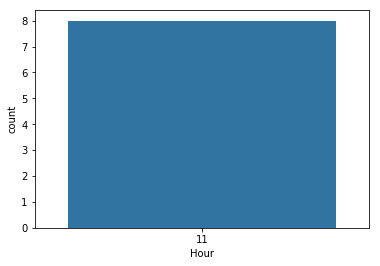

In [773]:
ax = sns.countplot(x="Hour", data=df_new2)

(8, 19)
   index       Date      Time   Destination  ... Jueves Viernes  Sábado Domingo
0    143  5/12/2019  11:39 AM  MARLBORO, MA  ...      0       0       0       1
1    145  5/12/2019  11:36 AM  MARLBORO, MA  ...      0       0       0       1
2    147  5/12/2019  11:21 AM  MARLBORO, MA  ...      0       0       0       1
3    148  5/12/2019  11:21 AM  MARLBORO, MA  ...      0       0       0       1
4    149  5/12/2019  11:20 AM  MARLBORO, MA  ...      0       0       0       1
5    150  5/12/2019  11:20 AM  MARLBORO, MA  ...      0       0       0       1
6    151  5/12/2019  11:20 AM  MARLBORO, MA  ...      0       0       0       1
7    158  5/12/2019  11:00 AM            --  ...      0       0       0       1

[8 rows x 19 columns]
(8, 11)
   Lunes  Martes  Miércoles  Jueves  ...  Madrugada  Mañana  Tarde  Noche
0      0       0          0       0  ...          0       1      0      0
1      0       0          0       0  ...          0       1      0      0
2      0       0   

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Cuadro
         Day  Madrugada  Mañana  Tarde  Noche
0      Lunes        0.0     0.0    0.0    0.0
1     Martes        0.0     0.0    0.0    0.0
2  Miércoles        0.0     0.0    0.0    0.0
3     Jueves        0.0     0.0    0.0    0.0
4    Viernes        0.0     0.0    0.0    0.0
5     Sábado        0.0     0.0    0.0    0.0
6    Domingo        0.0     8.0    0.0    0.0


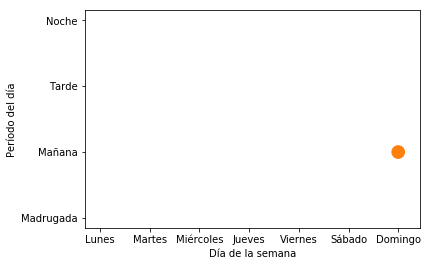

In [774]:
df_new2['Madrugada'] = np.where((df_new2['Hour']>=0) & (df_new2['Hour']<6), 1, 0)
df_new2['Mañana'] = np.where((df_new2['Hour']>=6) & (df_new2['Hour']<12), 1, 0)
df_new2['Tarde'] = np.where((df_new2['Hour']>=12) & (df_new2['Hour']<18), 1, 0)
df_new2['Noche'] = np.where((df_new2['Hour']>=18) & (df_new2['Hour']<24), 1, 0)
df_new2['Lunes'] = np.where((df_new2['Weekday']=='Monday'), 1, 0)
df_new2['Martes'] = np.where((df_new2['Weekday']=='Tuesday'), 1, 0)
df_new2['Miércoles'] = np.where((df_new2['Weekday']=='Wednesday'), 1, 0)
df_new2['Jueves'] = np.where((df_new2['Weekday']=='Thursday'), 1, 0)
df_new2['Viernes'] = np.where((df_new2['Weekday']=='Friday'), 1, 0)
df_new2['Sábado'] = np.where((df_new2['Weekday']=='Saturday'), 1, 0)
df_new2['Domingo'] = np.where((df_new2['Weekday']=='Sunday'), 1, 0)


print(df_new2.shape)
print(df_new2.head(20))


df_new3=df_new2[['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado',
                 'Domingo', 'Madrugada', 'Mañana', 'Tarde', 'Noche']]

#Analysis
print(df_new3.shape)
print(df_new3.head(20))
print(df.describe())
print(df_new2.groupby('Weekday').size())
print(df_new3.groupby('Madrugada').size())
print(df_new3.groupby('Mañana').size())
print(df_new3.groupby('Tarde').size())
print(df_new3.groupby('Noche').size())
#print(df_new3.groupby('Volume').size())

#MONDAY:
dfLunesMadrugada = df_new2.loc[(df_new2['Weekday']=='Monday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume','Weekday' ]]
print('dfLunesMadrugada')
print(len(dfLunesMadrugada))

print('AverageLunesMadrugada')
print(dfLunesMadrugada.Date.value_counts())
AverageLunesMadrugada = float(len(dfLunesMadrugada))
print(AverageLunesMadrugada)

dfLunesMañana = df_new2.loc[(df_new2['Weekday']=='Monday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfLunesMañana')
#print(dfLunesMañana)

print('AverageLunesMañana')
AverageLunesMañana = float(len(dfLunesMañana))
print(AverageLunesMañana)

dfLunesTarde = df_new2.loc[(df_new2['Weekday']=='Monday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfLunesTarde')
#print(dfLunesTarde)

print('AverageLunesTarde')
AverageLunesTarde = float(len(dfLunesTarde))
print(AverageLunesTarde)

dfLunesNoche = df_new2.loc[(df_new2['Weekday']=='Monday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfLunesNoche')
#print(dfLunesNoche)

print('AverageLunesNoche')
AverageLunesNoche = float(len(dfLunesNoche))
print(AverageLunesNoche)


#TUESDAY:
dfMartesMadrugada = df_new2.loc[(df_new2['Weekday']=='Tuesday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMartesMadrugada')
#print(dfMartesMadrugada)

print('AverageMartesMadrugada')
AverageMartesMadrugada = len(dfMartesMadrugada)
print(AverageMartesMadrugada)

dfMartesMañana = df_new2.loc[(df_new2['Weekday']=='Tuesday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMartesMañana')
#print(dfMartesMañana)

print('AverageMartesMañana')
AverageMartesMañana = len(dfMartesMañana)
print(AverageMartesMañana)

dfMartesTarde = df_new2.loc[(df_new2['Weekday']=='Tuesday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMartesTarde')
#print(dfMartesTarde)

print('AverageMartesTarde')
AverageMartesTarde = len(dfMartesTarde)
print(AverageMartesTarde)

dfMartesNoche = df_new2.loc[(df_new2['Weekday']=='Tuesday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMartesNoche')
#print(dfMartesNoche)

print('AverageMartesNoche')
AverageMartesNoche = len(dfMartesNoche)
print(AverageMartesNoche)


#WEDNESDAY:
dfMiércolesMadrugada = df_new2.loc[(df_new2['Weekday']=='Wednesday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMiércolesMadrugada')
#print(dfMiércolesMadrugada)

print('AverageMiércolesMadrugada')
AverageMiércolesMadrugada = len(dfMiércolesMadrugada)
print(AverageMiércolesMadrugada)


dfMiércolesMañana = df_new2.loc[(df_new2['Weekday']=='Wednesday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMiércolessMañana')
#print(dfMiércolesMañana)

print('AverageMiércolesMañana')
AverageMiércolesMañana = len(dfMiércolesMañana)
print(AverageMiércolesMañana)

dfMiércolesTarde = df_new2.loc[(df_new2['Weekday']=='Wednesday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMiércolesTarde')
#print(dfMiércolesTarde)

print('AverageMiércolesTarde')
AverageMiércolesTarde = len(dfMiércolesTarde)
print(AverageMiércolesTarde)


dfMiércolesNoche = df_new2.loc[(df_new2['Weekday']=='Wednesday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfMiércolesNoche')
#print(dfMiércolesNoche)

print('AverageMiércolesNoche')
AverageMiércolesNoche = len(dfMiércolesNoche)
print(AverageMiércolesNoche)


#THURSDAY:
dfJuevesMadrugada = df_new2.loc[(df_new2['Weekday']=='Thursday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfJuevesMadrugada')
#print(dfJuevesMadrugada)

print('AverageJuevesMadrugada')
AverageJuevesMadrugada = len(dfJuevesMadrugada)
print(AverageJuevesMadrugada)


dfJuevesMañana = df_new2.loc[(df_new2['Weekday']=='Thursday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfJuevessMañana')
#print(dfJuevesMañana)

print('AverageJuevesMañana')
AverageJuevesMañana = len(dfJuevesMañana)
print(AverageJuevesMañana)

dfJuevesTarde = df_new2.loc[(df_new2['Weekday']=='Thursday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfJuevesTarde')
#print(dfJuevesTarde)

print('AverageJuevesTarde')
AverageJuevesTarde = len(dfJuevesTarde)
print(AverageJuevesTarde)

dfJuevesNoche = df_new2.loc[(df_new2['Weekday']=='Thursday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfJuevesNoche')
#print(dfJuevesNoche)

print('AverageJuevesNoche')
AverageJuevesNoche = len(dfJuevesNoche)
print(AverageJuevesNoche)


#FRIDAY:
dfViernesMadrugada = df_new2.loc[(df_new2['Weekday']=='Friday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfViernesMadrugada')
#print(dfViernesMadrugada)

print('AverageViernesMadrugada')
AverageViernesMadrugada = len(dfViernesMadrugada)
print(AverageViernesMadrugada)

dfViernesMañana = df_new2.loc[(df_new2['Weekday']=='Friday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfViernessMañana')
#print(dfViernesMañana)

print('AverageViernesMañana')
AverageViernesMañana = len(dfViernesMañana)
print(AverageViernesMañana)

dfViernesTarde = df_new2.loc[(df_new2['Weekday']=='Friday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfViernesTarde')
#print(dfViernesTarde)

print('AverageViernesTarde')
AverageViernesTarde = len(dfViernesTarde)
print(AverageViernesTarde)

dfViernesNoche = df_new2.loc[(df_new2['Weekday']=='Friday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfViernesNoche')
#print(dfViernesNoche)

print('AverageViernesNoche')
AverageViernesNoche = len(dfViernesNoche)
print(AverageViernesNoche)


#SATURDAY:
dfSábadoMadrugada = df_new2.loc[(df_new2['Weekday']=='Saturday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfSábadoMadrugada')
#print(dfSábadoMadrugada)

print('AverageSábadoMadrugada')
AverageSábadoMadrugada = len(dfSábadoMadrugada)
print(AverageSábadoMadrugada)

dfSábadoMañana = df_new2.loc[(df_new2['Weekday']=='Saturday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfSábadoMañana')
#print(dfSábadoMañana)

print('AverageSábadoMañana')
AverageSábadoMañana = len(dfSábadoMañana)
print(AverageSábadoMañana)

dfSábadoTarde = df_new2.loc[(df_new2['Weekday']=='Saturday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfSábadoTarde')
#print(dfSábadoTarde)

print('AverageSábadoTarde')
AverageSábadoTarde = len(dfSábadoTarde)
print(AverageSábadoTarde)

dfSábadoNoche = df_new2.loc[(df_new2['Weekday']=='Saturday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfSábadoNoche')
#print(dfSábadoNoche)

print('AverageSábadoNoche')
AverageSábadoNoche = len(dfSábadoNoche)
print(AverageSábadoNoche)


#SATURDAY:
dfDomingoMadrugada = df_new2.loc[(df_new2['Weekday']=='Sunday') & (df_new2['Hour']>=0) & (df_new2['Hour']<6), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfDomingoMadrugada')
#print(dfDomingoMadrugada)

print('AverageDomingoMadrugada')
AverageDomingoMadrugada = len(dfDomingoMadrugada)
print(AverageDomingoMadrugada)

dfDomingoMañana = df_new2.loc[(df_new2['Weekday']=='Sunday') & (df_new2['Hour']>=6) & (df_new2['Hour']<12), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfDomingoMañana')
#print(dfDomingoMañana)

print('AverageDomingoMañana')
AverageDomingoMañana = len(dfDomingoMañana)
print(AverageDomingoMañana)

dfDomingoTarde = df_new2.loc[(df_new2['Weekday']=='Sunday') & (df_new2['Hour']>=12) & (df_new2['Hour']<18), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfDomingoTarde')
#print(dfDomingoTarde)

print('AverageDomingoTarde')
AverageDomingoTarde = len(dfDomingoTarde)
print(AverageDomingoTarde)

dfDomingoNoche = df_new2.loc[(df_new2['Weekday']=='Sunday') & (df_new2['Hour']>=18) & (df_new2['Hour']<24), ['Date', 'Time', 'Volume', 'Weekday']]
#print('dfDomingoNoche')
#print(dfDomingoNoche)

print('AverageDomingoNoche')
AverageDomingoNoche = len(dfDomingoNoche)
print(AverageDomingoNoche)

columns = ['Day', 'Madrugada','Mañana', 'Tarde', 'Noche']
Cuadro = pd.DataFrame(columns=columns)
Cuadro = Cuadro.fillna(0) # with 0s rather than NaNs
print('Cuadro')
#print(Cuadro)

Cuadro.loc['0'] = pd.Series({'Day': 'Lunes', 'Madrugada':AverageLunesMadrugada, 'Mañana':AverageLunesMañana, 'Tarde':AverageLunesTarde,
          'Noche':AverageLunesNoche})
Cuadro.loc['1'] = pd.Series({'Day':'Martes', 'Madrugada':AverageMartesMadrugada, 'Mañana':AverageMartesMañana, 'Tarde':AverageMartesTarde,
          'Noche':AverageMartesNoche})
Cuadro.loc['2'] = pd.Series({'Day':'Miércoles', 'Madrugada':AverageMiércolesMadrugada, 'Mañana':AverageMiércolesMañana, 'Tarde':AverageMiércolesTarde,
          'Noche':AverageMiércolesNoche})
Cuadro.loc['3'] = pd.Series({'Day':'Jueves', 'Madrugada':AverageJuevesMadrugada, 'Mañana':AverageJuevesMañana, 'Tarde':AverageJuevesTarde,
          'Noche':AverageJuevesNoche})
Cuadro.loc['4'] = pd.Series({'Day':'Viernes', 'Madrugada':AverageViernesMadrugada, 'Mañana':AverageViernesMañana, 'Tarde':AverageViernesTarde,
          'Noche':AverageViernesNoche})
Cuadro.loc['5'] = pd.Series({'Day':'Sábado', 'Madrugada':AverageSábadoMadrugada, 'Mañana':AverageSábadoMañana, 'Tarde':AverageSábadoTarde,
          'Noche':AverageSábadoNoche})
Cuadro.loc['6'] = pd.Series({'Day':'Domingo', 'Madrugada':AverageDomingoMadrugada, 'Mañana':AverageDomingoMañana, 'Tarde':AverageDomingoTarde,
          'Noche':AverageDomingoNoche})
print(Cuadro)


df = Cuadro
fig, ax = plt.subplots()
ax.scatter(df['Day'], ['Madrugada']*7, s=20*df['Madrugada'])
ax.scatter(df['Day'], ['Mañana']*7, s=20*df['Mañana'])
ax.scatter(df['Day'], ['Tarde']*7, s=20*df['Tarde'])
ax.scatter(df['Day'], ['Noche']*7, s=20*df['Noche'])
plt.ylabel('Período del día')
plt.xlabel('Día de la semana')
plt.show()